# Train

## なにをするのか

Preprocessed Datasetを用い、Modelを学習します。

## なぜやるのか

有用性の検証を行うために、学習済みの機械学習モデルが必要です。

## どうやるのか

Business goalの達成に適切な機械学習モデルを選択し、学習します。モデルの選択と学習をプログラミング演習で行います。

### プログラミング演習

モデルの選択、モデルの学習、学習のチューニングの3段階で進めます。高性能なライブラリやAuto MLの登場により自分でモデルを選択する機会自体が少なくなりつつありますが、`scikit-learn`で提示されているモデル選択のマップは有用です。

<img src="./images/05_train_001.PNG" alt="05_train_001.PNG" width=700></img>

今回は`ElasticNet`/`Lasso`に該当します。モデルの違いについては本章で詳しくは触れませんが、`Lasso`の特性も含む`ElasticNet`を採用します。

学習するため、前処理済みのデータを読み込みます。

In [1]:
from pathlib import Path
import pandas as pd


train_data_path = Path("../data/processed/train.csv")
train_df = pd.read_csv(train_data_path)

In [2]:
train_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,1.694636,-0.872215,-0.289375,-0.201389,0.654978,-0.516787,1.084470,0.927217,0.017048,-0.972807,...,3.0,1.0,5.0,2.0,1.0,1.0,4.0,8.0,1.0,0.0
1,-1.580912,0.309804,-0.825127,-0.020976,0.654978,0.381893,-1.664144,-1.688593,-0.575503,-0.972807,...,4.0,2.0,17.0,2.0,1.0,1.0,4.0,8.0,1.0,0.0
2,1.587902,-0.163004,-0.783915,-0.434824,-0.070070,0.381893,-1.531681,0.249044,-0.575503,-0.393005,...,3.0,2.0,18.0,2.0,1.0,1.0,4.0,8.0,1.0,0.0
3,-0.404466,1.491823,-0.083316,-0.733007,0.654978,-0.516787,1.051354,0.927217,-0.474881,-0.972807,...,3.0,1.0,0.0,2.0,1.0,1.0,4.0,8.0,1.0,0.0
4,0.188501,0.428006,0.823341,-0.241481,-0.795118,-0.516787,-2.425809,-0.961979,-0.575503,-0.972807,...,4.0,2.0,17.0,0.0,1.0,3.0,4.0,8.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.392481,0.073400,0.040319,-0.346120,-0.070070,-0.516787,-0.273279,-1.058861,1.744388,-0.094320,...,3.0,1.0,12.0,2.0,1.0,3.0,4.0,8.0,1.0,0.0
1017,-1.642580,-0.872215,0.163954,-0.198182,-0.795118,0.381893,-0.571322,0.249044,3.058061,1.691205,...,3.0,1.0,12.0,2.0,1.0,3.0,4.0,8.0,1.0,0.0
1018,0.458894,1.491823,-0.825127,-0.250301,-0.070070,-0.516787,0.720196,0.442808,-0.575503,-0.610431,...,3.0,2.0,20.0,2.0,1.0,1.0,4.0,8.0,1.0,0.0
1019,0.506331,0.782612,1.235458,1.452399,-0.795118,-1.415466,-0.140816,-0.865097,-0.575503,-0.972807,...,3.0,2.0,11.0,1.0,1.0,1.0,4.0,8.0,1.0,0.0


モデルの学習を行います。`scikit-learn`では`fit`するだけです。学習結果は、モデルのパラメーター(`ElasticNet`であれば`l1_ratio`など)にも大きく依存します。そのため、精度がBusiness goalの達成にクリティカルであればハイパーパラメーターの調整も行う必要があります。

In [3]:
from sklearn.linear_model import ElasticNet


X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]
model = ElasticNet(l1_ratio=0.3)
model.fit(X, y)

ElasticNet(l1_ratio=0.3)

`ElasticNet`は線形のモデルのため、個別の特徴量に対し重みをもちます。重みを確認してみましょう。

<AxesSubplot:>

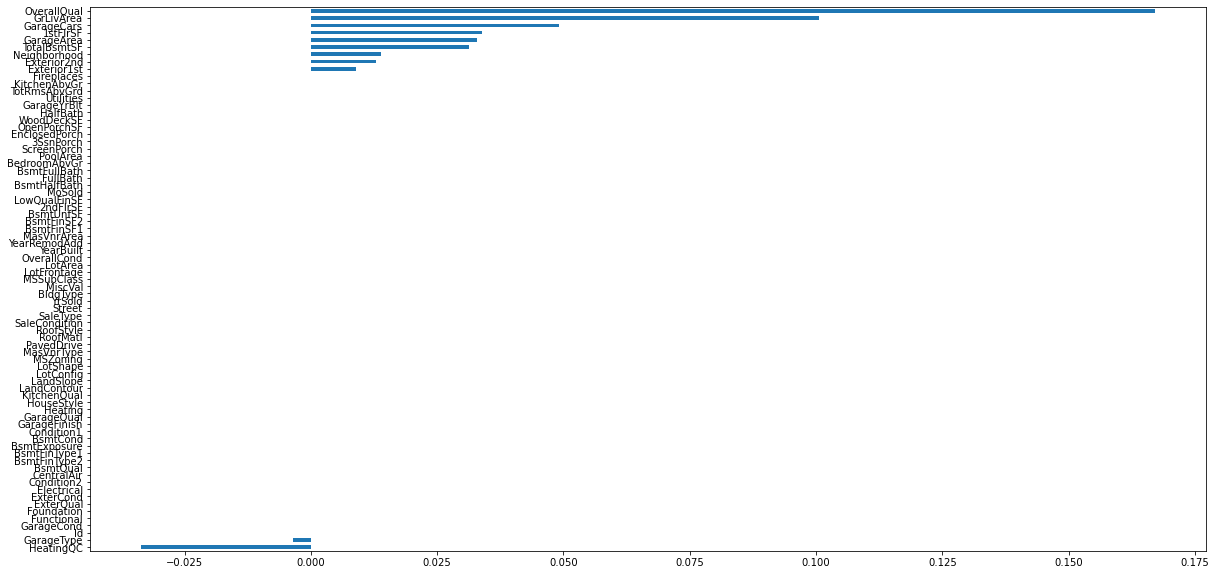

In [4]:
pd.Series(model.coef_, index=model.feature_names_in_).sort_values().plot.barh(figsize=(20, 10))

Analyzeの結果が示唆するように、OverallQualに重みがかかっていることが読み取れます。

*Exercise: 他のモデルでも学習してみましょう。 例: RandomForestRegressor*

In [5]:
from sklearn.ensemble import RandomForestRegressor


other_model = RandomForestRegressor(n_estimators=20, max_features='auto')
other_model.fit(X, y)

RandomForestRegressor(n_estimators=20)

<AxesSubplot:>

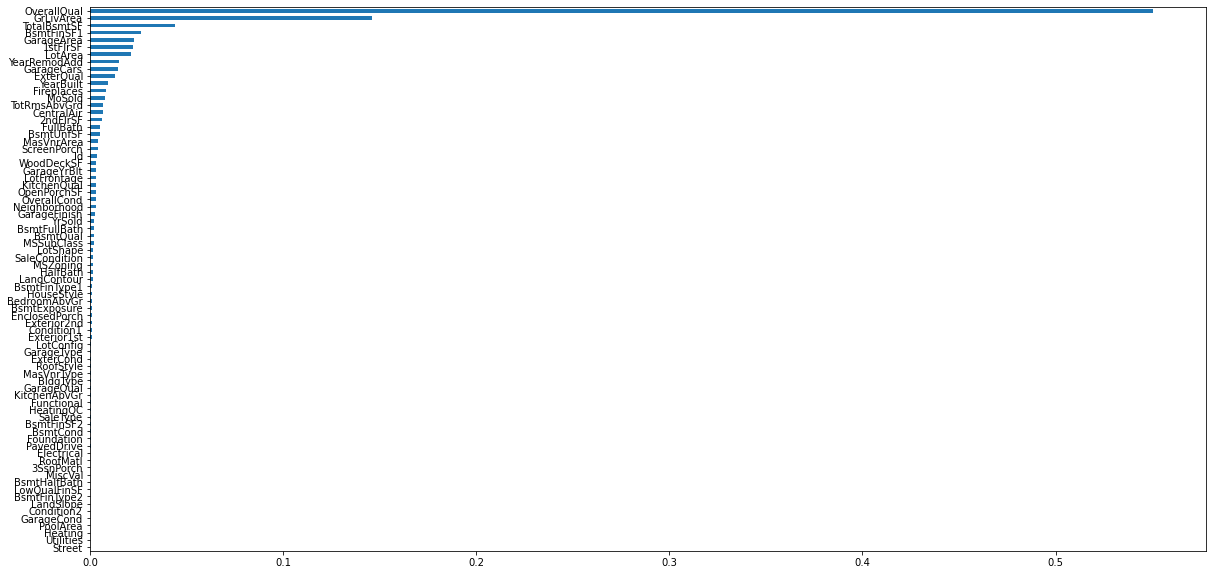

In [6]:
pd.Series(other_model.feature_importances_, index=X.columns).sort_values().plot.barh(figsize=(20, 10))

分析はTestで行いましょう。モデルを保存します。

In [7]:
from joblib import dump


# 2つとも保存します。
for model_name in ("model", "other_model"):
    model_path = Path(f"../model/{model_name}.joblib")
    dump(model, model_path) 

### コミュニケーション演習

データサイエンティストとして、機械学習モデルの学習の妥当性を確認するために誰にどのような質問をすべきでしょうか。

| 英語名             | 日本語名                   | 役割                                                                 |
|--------------------|----------------------------|------------------------------|
| Product Manager    | プロダクトマネージャー     | ユーザー体験を向上させるために実装すべきソフトウェア機能を定義する。 |
| Business Analyst   | ビジネスアナリスト         | 解決すべきビジネス上の問題を定義する                                 |
| Data Analyst       | データアナリスト           | データの可視化と分析で問題を定量的に特定する。                       |
| Architect          | アーキテクト               | ソフトウェアアーキテクチャ全体を設計する。                           |
| DevOps Engineer    | DevOpsエンジニア           | ソフトウェアの開発・運用プロセスを自動化する。                       |
| Software Engineer  | ソフトウェアエンジニア     | ソフトウェアの開発を行う。                                           |
| Operator           | 業務担当者                 | ソフトウェアを利用し業務を行う。                                     |
| System Admin       | システム管理者             | サービスの挙動を監視する。                                           |
| IT Auditor         | IT監督者                   | システムや会社全体の権限管理や監査を行う。                           |
| Data architect     | データアーキテクト         | データを管理する基盤を設計、運用する。                               |
| Domain Expert      | 業務有識者                 | 深い業務知識を持ちデータの意味やあるべき状態について定義する。       |
| Data Scientist     | データサイエンティスト     | 機械学習モデルを開発する。     

#### 質問例

* Data Scientist(もし他の方がいれば)
   * この問題に対し、どのようなモデルを選択するのが適切でしょうか。

## Next Step

[Test](06_test.ipynb)

## References

1. Sebastian Raschka, Vahid Mirjalili, 株式会社クイープ and 福島 真太朗. [Python機械学習プログラミング 達人データサイエンティストによる理論と実践 ](https://www.amazon.co.jp/dp/4844380605). 2020.

関連するAWSのサービス

1. SageMaker Training
2. SageMaker Experiments
3. SageMaker Debugger
4. SageMaker AutoPilot
5. SageMaker Canvas
